# Before you start :
   - These exercises are related to the Pivot table and correlation lessons.
   - Keep in mind that you need to use some of the functions you learned in the previous lessons.
   - All datasets are provided in the `your-code` folder of this lab.
   - Elaborate your codes and outputs as much as you can.
   - Try your best to answer the questions and complete the tasks and most importantly enjoy the process!!!

#### Import all the libraries that are necessary

In [1]:
# import libraries here
import numpy as np
import pandas as pd
import seaborn as sns
import statistics as stats
import pylab as plt

from functools import reduce
from scipy import stats as st
from collections import Counter

# Challenge 1

#### Open the ` Employee.csv` file and name your dataset `employee`

In [2]:
employee = pd.read_csv('./Employee.csv')
employee.head()

,Name,Department,Education,Gender,Title,Years,Salary
0,Jose,IT,Bachelor,M,analyst,1,35
1,Maria,IT,Master,F,analyst,2,30
2,David,HR,Master,M,analyst,2,30
3,Sonia,HR,Bachelor,F,analyst,4,35
4,Samuel,Sales,Master,M,associate,3,55


#### What's the mean salary by department. 
##### Tip : There are 2 ways to do it - one way is with and the other way is without pivot tables. Do it both ways. 


In [5]:
depa = employee.groupby('Department')
depa.head()

,Name,Department,Education,Gender,Title,Years,Salary
0,Jose,IT,Bachelor,M,analyst,1,35
1,Maria,IT,Master,F,analyst,2,30
2,David,HR,Master,M,analyst,2,30
3,Sonia,HR,Bachelor,F,analyst,4,35
4,Samuel,Sales,Master,M,associate,3,55
5,Eva,Sales,Bachelor,F,associate,2,55
6,Carlos,IT,Master,M,VP,8,70
7,Pedro,IT,Phd,M,associate,7,60
8,Ana,HR,Master,F,VP,8,70


In [8]:
depa.Salary.mean()

Department
HR       45.00
IT       48.75
Sales    55.00
Name: Salary, dtype: float64

In [10]:
tabla = pd.pivot_table(employee, values='Salary', index='Department', aggfunc='mean')
tabla

,Salary
Department,
HR,45.00
IT,48.75
Sales,55.00


#### We want now to group the data by more than one column. Use Pandas pivot table function to select the mean salary by department and title

In [11]:
tabla = pd.pivot_table(employee, values=['Salary'], index=['Department', 'Title'], aggfunc='mean')
tabla

Salary
Department Title            
HR         VP           70.0
           analyst      32.5
IT         VP           70.0
           analyst      32.5
           associate    60.0
Sales      associate    55.0

#### We want to display the number of years of work experience and the salary for each Title. Add Years as a column in your pivot table
*Hint: Use Pandas doc(see References in README.md) to explore the pivot_table() arguments*

In [14]:
tabla = pd.pivot_table(employee, values=['Years','Salary'], index=['Title'],aggfunc={'Years':['min','max','mean'], 'Salary': ['min','max','mean']})
tabla

Salary                Years          
             max       mean min   max  mean min
Title                                          
VP            70  70.000000  70     8  8.00   8
analyst       35  32.500000  30     4  2.25   1
associate     60  56.666667  55     7  4.00   2

#### We want to know the information about the mean salary and number of employees in each department and for each job title

In [15]:
tabla = pd.pivot_table(employee, values=['Years','Salary'], index=['Department', 'Title'], aggfunc={'Years':'count', 'Salary':'mean'})
tabla

Salary  Years
Department Title                   
HR         VP           70.0      1
           analyst      32.5      2
IT         VP           70.0      1
           analyst      32.5      2
           associate    60.0      1
Sales      associate    55.0      2

#### We want to know for each department and for each job title the Salary's median,minimum,maximum and standard deviation. Comment your results

In [17]:
tabla = pd.pivot_table(employee, values='Salary', index=['Department', 'Title'], aggfunc={'Salary':['median','min','max','std']})
tabla

max  median  min       std
Department Title                                
HR         VP          70    70.0   70       NaN
           analyst     35    32.5   30  3.535534
IT         VP          70    70.0   70       NaN
           analyst     35    32.5   30  3.535534
           associate   60    60.0   60       NaN
Sales      associate   55    55.0   55  0.000000

#### Based on your comments, fill the missing values with an appropriate value

In [19]:
# The missing values for the std with a fixed salary of 70k for VP's, and 60k for assoaciates in IT is 0.
tabla = tabla.fillna(0)
tabla

max  median  min       std
Department Title                                
HR         VP          70    70.0   70  0.000000
           analyst     35    32.5   30  3.535534
IT         VP          70    70.0   70  0.000000
           analyst     35    32.5   30  3.535534
           associate   60    60.0   60  0.000000
Sales      associate   55    55.0   55  0.000000

#### The stake holders want to know for each department the number of employees and how much money is spend on salaries. Could you provide that information? 

In [21]:
tabla = pd.pivot_table(employee, values=['Salary', 'Name'], index=['Department'], aggfunc={'Salary':'sum','Name':'count'})
tabla

,Name,Salary
Department,,
HR,3,135
IT,4,195
Sales,2,110


#### For each Department and Title, we want to know the the total years of work experience and the mean salary

In [22]:
tabla = pd.pivot_table(employee, values=['Salary', 'Years'], index=['Department', 'Title'], aggfunc={'Salary':['mean'],'Years':'sum'})
tabla

Salary Years
                       mean   sum
Department Title                 
HR         VP          70.0     8
           analyst     32.5     6
IT         VP          70.0     8
           analyst     32.5     3
           associate   60.0     7
Sales      associate   55.0     5

#### Bonus

#### We now want to compute the mean salary after removing the maxima for each Department. Create the appropriate pivot table

#### * Hint: Write a custom function*

In [23]:
# LUEGO LO HAGO!!

# Challenge 2

#### Open the ` Fitbit.csv` file and name your dataset `fitbit`

In [24]:
fitbit = pd.read_csv('./Fitbit.csv')
fitbit.head()

,Date,Calorie burned,Steps,Distance,Floors,Minutes Sedentary,Minutes Lightly Active,Minutes Fairly Active,Minutes Very Active,Activity Calories,MinutesOfSleep,MinutesOfBeingAwake,NumberOfAwakings,LengthOfRestInMinutes
0,08-05-2015,1934,905,0.65,0,1.355,46,0,0,1680,384,26,23,417
1,09-05-2015,3631,18925,14.11,4,611.000,316,61,60,2248,454,35,21,491
2,10-05-2015,3204,14228,10.57,1,602.000,226,14,77,1719,387,46,25,436
3,11-05-2015,2673,6756,5.02,8,749.000,190,23,4,9620,311,31,21,350
4,12-05-2015,2495,502,3.73,1,876.000,171,0,0,7360,407,65,44,491


#### Explore you dataset in terms of data types and descriptive statistics
#### *Hint: Use Pandas functions from previous lectures*

In [26]:
fitbit.describe().T

,count,mean,std,min,25%,50%,75%,max
Calorie burned,367.0,2741.501362,916.307036,179.000,2698.000,2974.00,3233.00,4351.00
Steps,367.0,10121.588556,5594.836225,0.000,6730.500,10413.00,13916.50,26444.00
Distance,367.0,8.549128,3.409881,0.000,6.155,8.29,10.56,20.45
Floors,367.0,11.724796,10.337370,0.000,5.000,11.00,16.00,101.00
Minutes Sedentary,367.0,563.934482,294.793145,1.002,520.000,663.00,756.50,998.00
Minutes Lightly Active,367.0,236.405995,86.531376,0.000,179.000,226.00,290.00,472.00
Minutes Fairly Active,367.0,26.163488,20.319456,0.000,8.000,24.00,41.50,101.00
Minutes Very Active,367.0,35.722071,31.006682,0.000,10.500,29.00,54.00,153.00
Activity Calories,367.0,2044.147139,2041.267168,0.000,1218.500,1553.00,1927.50,9830.00
MinutesOfSleep,367.0,290.479564,154.752328,0.000,224.000,337.00,400.50,553.00


In [27]:
fitbit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Date                    367 non-null    object 
 1   Calorie burned          367 non-null    int64  
 2   Steps                   367 non-null    int64  
 3   Distance                367 non-null    float64
 4   Floors                  367 non-null    int64  
 5   Minutes Sedentary       367 non-null    float64
 6   Minutes Lightly Active  367 non-null    int64  
 7   Minutes Fairly Active   367 non-null    int64  
 8   Minutes Very Active     367 non-null    int64  
 9   Activity Calories       367 non-null    int64  
 10  MinutesOfSleep          367 non-null    int64  
 11  MinutesOfBeingAwake     367 non-null    int64  
 12  NumberOfAwakings        367 non-null    int64  
 13  LengthOfRestInMinutes   367 non-null    int64  
dtypes: float64(2), int64(11), object(1)
memory

#### You suspect that there must be a linear relationship between the Minutes Very Active and the Steps. Compute the correlation between these variables.

In [28]:
st.pearsonr(fitbit['Minutes Very Active'],fitbit['Steps'])

PearsonRResult(statistic=0.5714518481062607, pvalue=3.357282499453129e-33)

In [29]:
# La correlación de Pearson nos da un valor de 0,571, existe una relación lineal pero no es altísima

#### Use matplotlib to visually plot Minutes Very active vs Steps. 

##### Hint : import matplotlib.pyplot as plt (See previous lessons)#####
- Use plt.scatter(x=df['col_name_1'], y=df['col_name_2'])

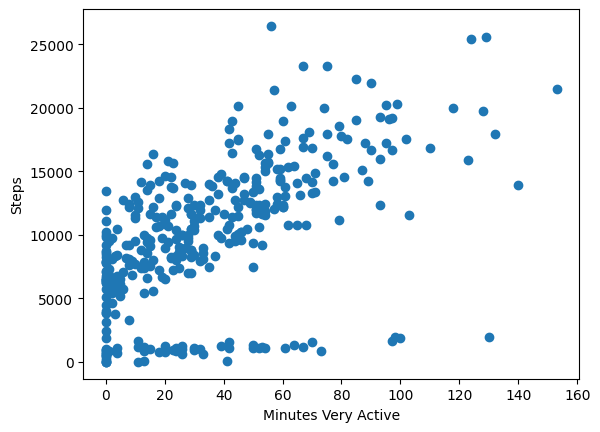

In [31]:
plt.scatter(x=fitbit['Minutes Very Active'], y=fitbit['Steps'])
plt.xlabel('Minutes Very Active')
plt.ylabel('Steps')

plt.show();

#### What can you say about Minute Very Active and Steps? Write a comment below

In [32]:
# Lo dicho arriba, exista una correlación positiva pero no es enorme. Existe una recta abajo a pocos pasos pero una variedad de minutos activos. 
# Esta puede ser que el usuario está realizando otra actividad pero no sumando pasos.

#### We also suspect that there must be a linear relationship between the Minutes Sedentary and the Steps. Compute the correlation between these variables.

In [33]:
st.pearsonr(fitbit['Minutes Sedentary'],fitbit['Steps'])

PearsonRResult(statistic=0.07690608062990092, pvalue=0.14143690593734595)

#### Use matplotlib to visually plot Minutes Sedentary vs Steps. Based on the results of the computed correlation and the plot. What can you say about these 2 variables?

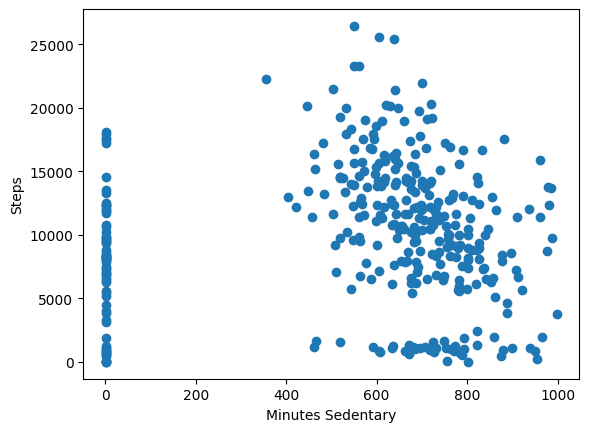

In [34]:
plt.scatter(x=fitbit['Minutes Sedentary'], y=fitbit['Steps'])
plt.xlabel('Minutes Sedentary')
plt.ylabel('Steps')

plt.show();

In [35]:
# En este caso la correlación es prácticamente nula. Se puede ver tanto con el factor de correlación de PEarson como con la nube de puntos.


#### We also suspect that there must be a linear relationship between the MinutesOfSleep and the Steps. Compute the correlation between these variables.

In [36]:
st.pearsonr(fitbit['MinutesOfSleep'],fitbit['Steps'])

PearsonRResult(statistic=0.13098565950836388, pvalue=0.012018728392518177)

#### Use matplotlib to visually plot MinutesOfSleep vs Steps. Based on the results of the computed correlation and the plot. What can you say about these 2 variables?

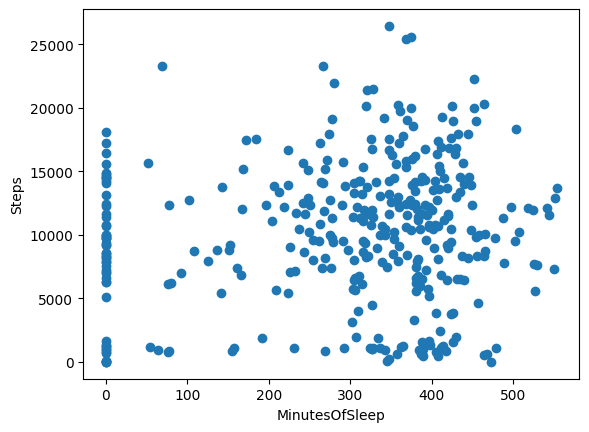

In [37]:
plt.scatter(x=fitbit['MinutesOfSleep'], y=fitbit['Steps'])
plt.xlabel('MinutesOfSleep')
plt.ylabel('Steps')

plt.show();

In [38]:
# Una vez más, la correlación es practicamente nula salco la recta en 0 minutos de sueño y un rango de pasos. Este número alto de pasos se puede deber tanto a actividades deportivas de muchas horas
# como días festivos/de fiesta en los que la gente no duerme y camina mucho.

#### Select a subset of your dataset with the columns below and compute the correlation matrix. Save the results in the variable `cor_fit`
column= ['Calorie burned', 'Steps','Floors','Minutes Sedentary','Minutes Very Active', 'MinutesOfSleep']

In [39]:
column= ['Calorie burned', 'Steps','Floors','Minutes Sedentary','Minutes Very Active', 'MinutesOfSleep']

In [40]:
subset_fitbit = fitbit[column]

In [43]:
cor_fit = subset_fitbit.corr()
cor_fit

,Calorie burned,Steps,Floors,Minutes Sedentary,Minutes Very Active,MinutesOfSleep
Calorie burned,1.000000,0.255305,0.130757,0.125353,0.197881,0.011485
Steps,0.255305,1.000000,0.306511,0.076906,0.571452,0.130986
Floors,0.130757,0.306511,1.000000,0.057812,0.399503,0.069464
Minutes Sedentary,0.125353,0.076906,0.057812,1.000000,0.105963,0.204242
Minutes Very Active,0.197881,0.571452,0.399503,0.105963,1.000000,0.108018
MinutesOfSleep,0.011485,0.130986,0.069464,0.204242,0.108018,1.000000


#### Based on the result of the correlation matrix. What are the highly correlated features with the variable Steps?
*Hint: From the results above select the variable Steps and order your results in descending order (use Pandas sort_values function)*

In [52]:
cor_fit.Steps.sort_values()

Minutes Sedentary      0.076906
MinutesOfSleep         0.130986
Calorie burned         0.255305
Floors                 0.306511
Minutes Very Active    0.571452
Steps                  1.000000
Name: Steps, dtype: float64

In [53]:
# Las dos variables que mayor correlación tienen con steps son 'Minutes very active' y 'Floors'

# Challenge 3

#### Open the `Time_Grades.csv` file and name your dataset `time_grades`

In [55]:
time_grades = pd.read_csv('./Time_Grades.csv')
time_grades

,Name,Study time,Grade
0,Jose,4,4
1,Maria,9,7
2,David,8,9
3,Sonia,10,7
4,Samuel,20,9
5,Eva,5,3
6,Carlos,12,7
7,Pedro,6,5
8,Ana,18,9
9,Gervasio,7,3


#### Show visually the frequency distribution of the time_grades dataset.

<Axes: xlabel='Grade', ylabel='count'>

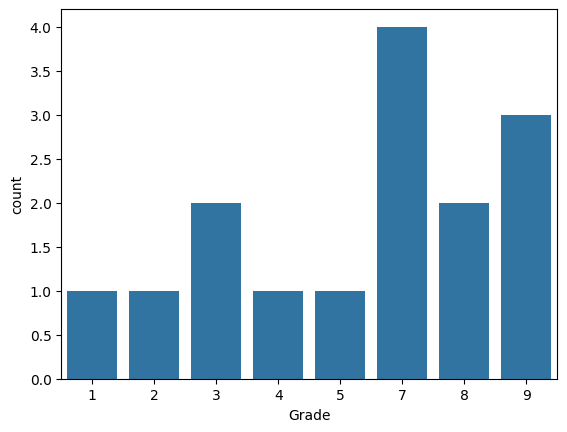

In [57]:
sns.countplot(x=time_grades.Grade)

#### Is there a correaltion between study time and Grade? Use both Pearson and Spearman correlation and comment your results.

In [58]:
st.pearsonr(time_grades['Study time'],time_grades['Grade'])

PearsonRResult(statistic=0.7980456073578858, pvalue=0.00036276352563427227)

In [59]:
st.spearmanr(time_grades['Study time'],time_grades['Grade'])

SignificanceResult(statistic=0.819658753036942, pvalue=0.00018377469445788485)

In [60]:
# Hay mayor correlación aplicando el método de Spearman que el de Pearson - Spearman se suele utilizar para evaluar la relación de variables ordinales.

#### Use matplotlib to visually plot Study time vs Grade. Based on the results of the computed correlation and the plot. What can you say about these 2 variables?

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


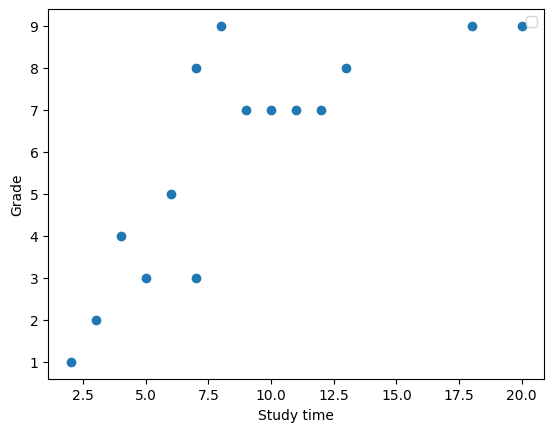

In [68]:
plt.scatter(time_grades['Study time'],time_grades['Grade'])
plt.xlabel('Study time')
plt.ylabel('Grade')
plt.legend();

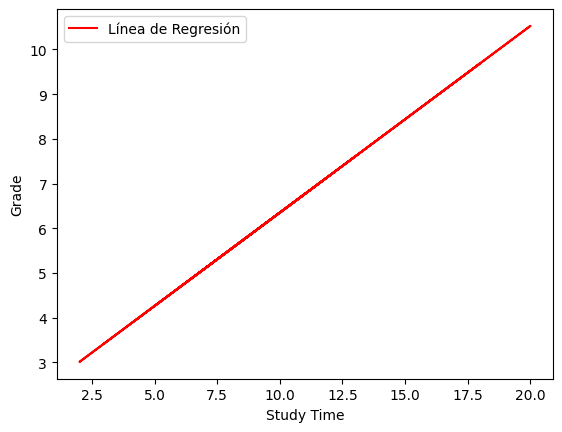

In [72]:
# Voy a añadir una línea de tendencia
pendiente, interc = np.polyfit(time_grades['Study time'],time_grades['Grade'], 1)
plt.plot(time_grades['Study time'], pendiente * np.array(time_grades['Study time']) + interc, color='red', label='Línea de Regresión')
plt.xlabel('Study Time')
plt.ylabel('Grade')
plt.legend()
plt.show()

In [73]:
# Aquí se puede ver la clara relación positiva que hay entre estudiar más y sacar mejores notas

#### Could you explain the difference between Pearson and Spearman correlation? (see References in README.md) 

* Pearson se fija o reacciona a como dos variables exactas cambian juntas mientras que Spearman se enfoca en el orden en que ocurren los datos sin importar la cantidad de veces qe ocurran. Como decíamos antes, pearson se suele emplear en variables ordinarias - no numéricas.